In [1]:
# manual annotation of key points
import csv

In [2]:
kreiman_csv = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (1).csv"
jaeson_csv = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam1.csv"




In [3]:
def removeScorer_otherInfo(csv_file):
    # remove indeces 0-3
    data = csv_file[3:]
    imgNames = []
    for i in range(len(data)):
        imgNames.append(data[i][2])
        temp = data[i]
        temp = temp[3:]
        data[i] = temp
    return [data, imgNames]
#b1_c1_j = removeScorer_otherInfo(rows)

In [4]:
def openCSV_getData(file_csv):
    file = open(file_csv)
    type(file)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    temp = removeScorer_otherInfo(rows)
    data = temp[0]
    imgNames = temp[1]
    return data, imgNames

In [5]:
kreiman = openCSV_getData(kreiman_csv)
b1_k, img1_k = kreiman[0], kreiman[1]

jaeson = openCSV_getData(jaeson_csv)
b1_j, img1_j = jaeson[0], jaeson[1]

In [6]:
def correctImages(img):
    new = []
    for i in range(len(img)):
        temp = 'frame' 
        t = img[i][3:7] 
        if t[0] == "0":
            t = t[1:]
        temp = temp + t + '.jpg'
        new.append(temp)
    return new
imgs = correctImages(img1_k)

In [7]:
print(img1_k)

['img0154.png', 'img0271.png', 'img0290.png', 'img0485.png', 'img0619.png', 'img0975.png', 'img1135.png', 'img1445.png', 'img1528.png', 'img1592.png', 'img1605.png', 'img1661.png', 'img1692.png', 'img1794.png', 'img1839.png', 'img1887.png', 'img2215.png', 'img2280.png', 'img2373.png', 'img2483.png', 'img2541.png', 'img2577.png', 'img2674.png', 'img2703.png', 'img2754.png', 'img2938.png', 'img3033.png', 'img3091.png', 'img3108.png', 'img3227.png', 'img3435.png', 'img3442.png', 'img3583.png', 'img3632.png', 'img3750.png', 'img3756.png', 'img3941.png', 'img3965.png', 'img3969.png', 'img4017.png', 'img4062.png', 'img4248.png', 'img4302.png', 'img4462.png', 'img4877.png', 'img4887.png', 'img5070.png', 'img5359.png', 'img5531.png', 'img5592.png']


In [8]:
import math
def distanceBetweenPoints(x1, y1, x2, y2):
    xDiff = abs(x2 - x1)
    yDiff = abs(y2 - y1)
    xDiff = xDiff**2
    yDiff = yDiff**2
    distance = xDiff + yDiff
    distance = math.pow(distance, 1/2)
    return distance
distanceBetweenPoints(0, 0, 5, 0)

5.0

In [19]:
from matplotlib import image
from matplotlib import pyplot as plt

def showPicture_3_23_23(h, n):
    directory = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam1/"
    directory = directory + imgs[n]
    img = image.imread(directory)
    plt.plot()
    colors = ["#7225F0", "#4494EA", "#80EED0", "#BAF09E", "#E4975A", "#E93223"]
    for i in range(6):
        x, y = 0, 0
        if h[i*2] != '' and h[i*2+1] != '':
            x, y = float(h[i*2]), float(h[i*2+1])
        plt.plot(x, y, color=colors[i], marker='.', markersize=20)
    
    plt.axis('off')
    plt.imshow(img, alpha=1)
    plt.show()


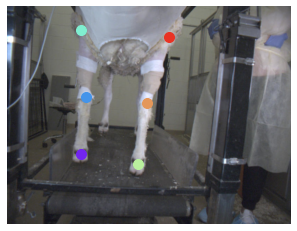

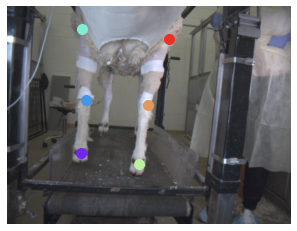

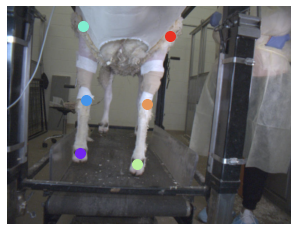

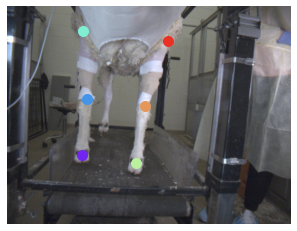

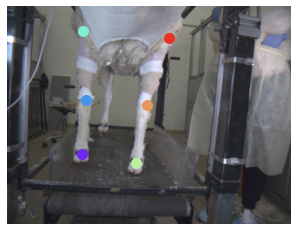

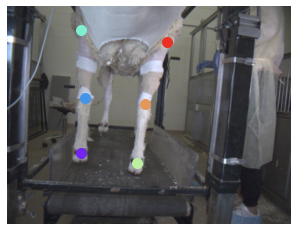

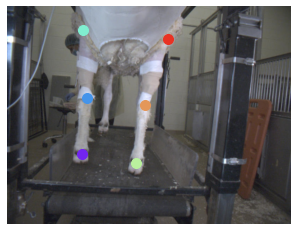

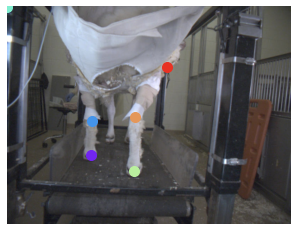

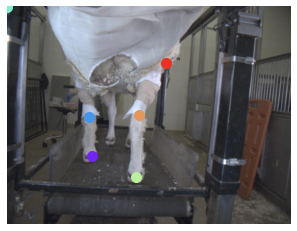

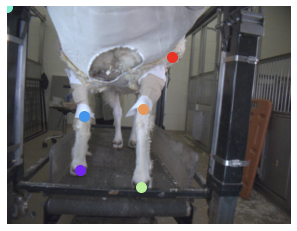

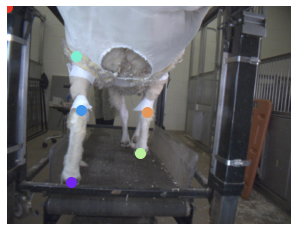

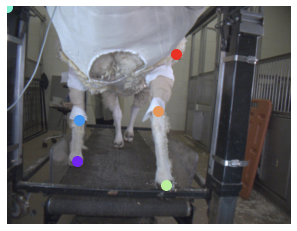

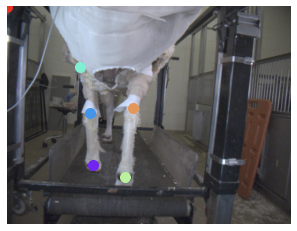

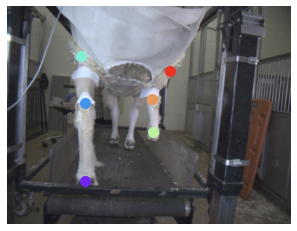

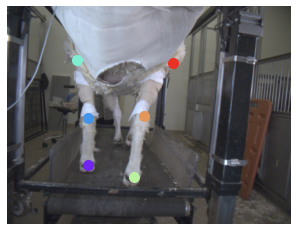

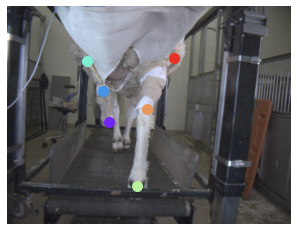

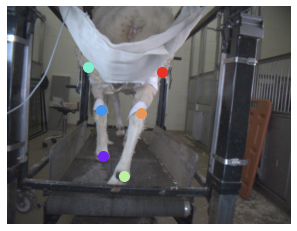

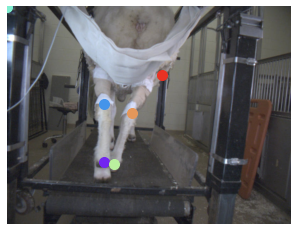

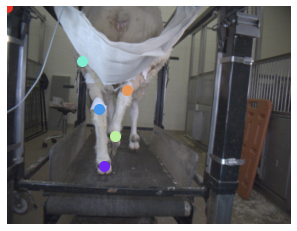

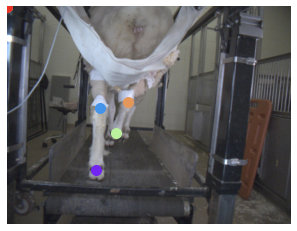

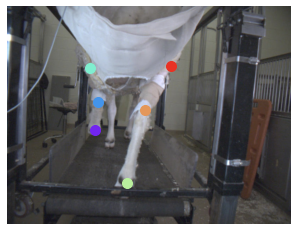

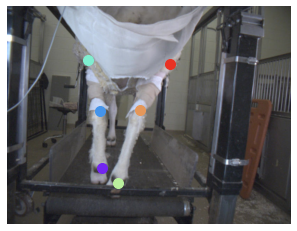

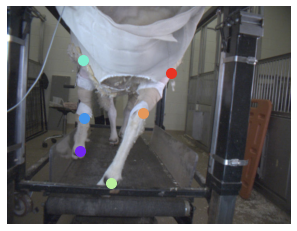

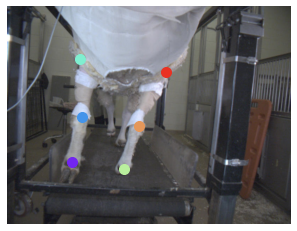

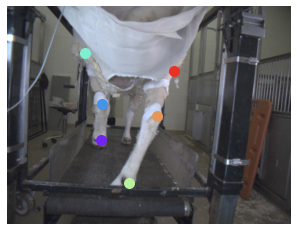

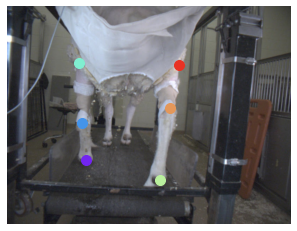

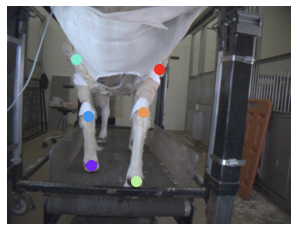

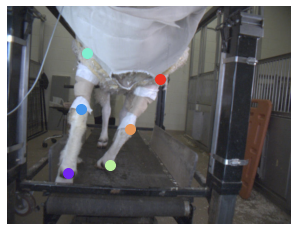

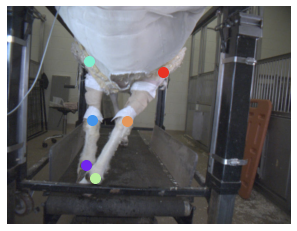

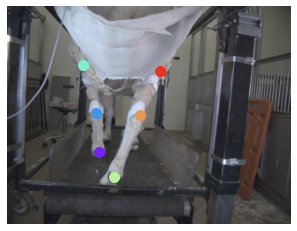

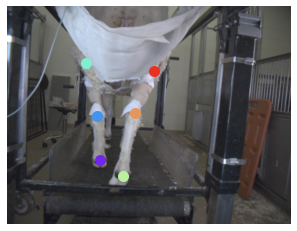

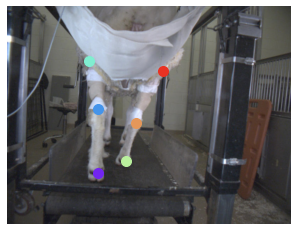

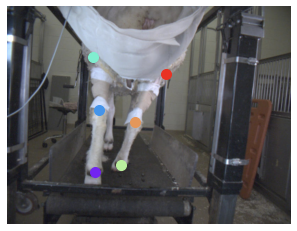

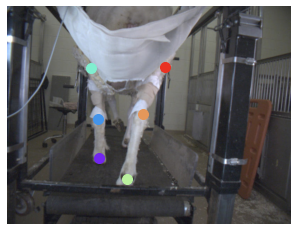

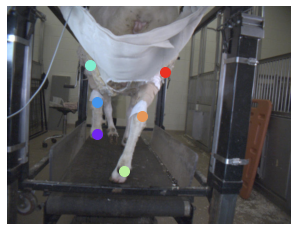

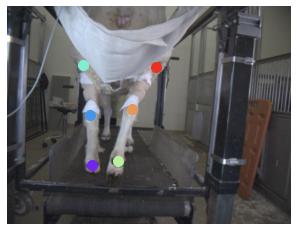

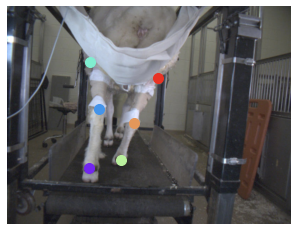

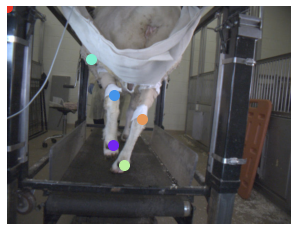

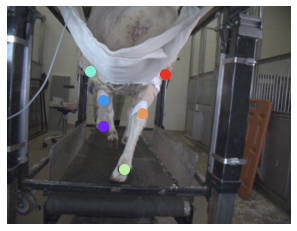

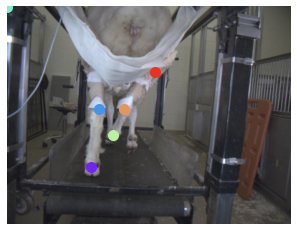

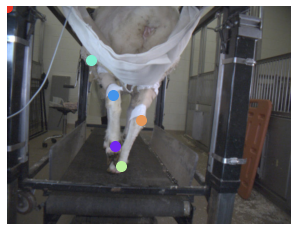

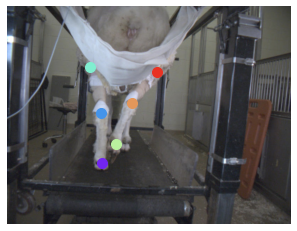

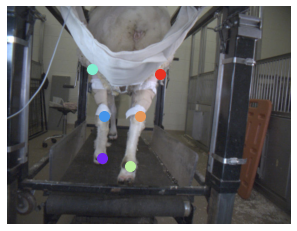

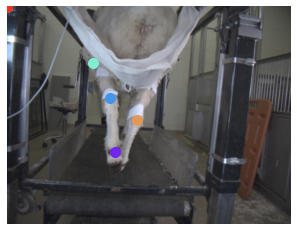

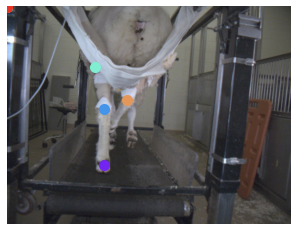

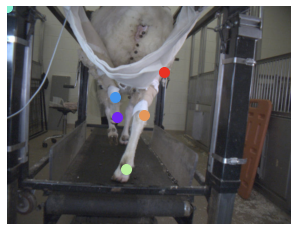

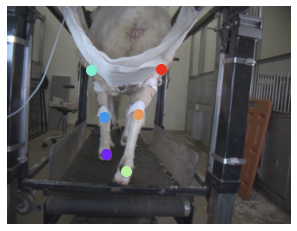

FileNotFoundError: [Errno 2] No such file or directory: '/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam1/frame5359.jpg'

In [10]:
def show_all_pictures(block):
    for i in range(len(block)): #50
        showPicture_3_23_23(block[i], i)
        print()
        print()
show_all_pictures(b1_k)

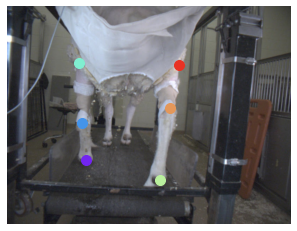

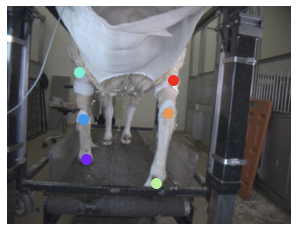

In [20]:
# for figure 3a
index = 25
showPicture_3_23_23(b1_k[index], index)
print()
showPicture_3_23_23(b1_j[index], index)

In [9]:
def big(pK, pJ):
    distances = 0
    distances += distanceBetweenPoints(float(pK[0]), float(pK[1]), float(pJ[0]), float(pJ[1]))
    distances += distanceBetweenPoints(float(pK[2]), float(pK[3]), float(pJ[2]), float(pJ[3]))
    distances += distanceBetweenPoints(float(pK[4]), float(pK[5]), float(pJ[4]), float(pJ[5]))
    distances += distanceBetweenPoints(float(pK[6]), float(pK[7]), float(pJ[6]), float(pJ[7]))
    distances += distanceBetweenPoints(float(pK[8]), float(pK[9]), float(pJ[8]), float(pJ[9]))
    distances += distanceBetweenPoints(float(pK[10]), float(pK[11]), float(pJ[10]), float(pJ[11]))
    
    if distances / 6 > 14:
        return True
    return False
big(b1_k[0], b1_j[0])


True

In [10]:
from matplotlib import image
from matplotlib import pyplot as plt

def showPicture(p, n):
    directory = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam1/"
    directory = directory + imgs[n]
    
    
    img = image.imread(directory)
    
    colors = ["#7225F0", "#4494EA", "#80EED0", "#BAF09E", "#E4975A", "#E93223"]
    plt.plot()
    for i in range(6):
        x, y = float(p[i*2]), float(p[i*2+1])
        
        plt.plot(x, y, color=colors[i], marker='.', markersize=16)
        
    #plt.plot(k_x, k_y, color='r', marker='.', markersize=8)
    #plt.plot(j_x, j_y, color='b', marker='.', markersize=8)
    # plt.legend(labels=[])
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
    

In [11]:
def getPerfectPicture(k, j):
    for i in range(len(k)): # 50
        if big(k[i], j[i]) == True:
            showPicture(k[i], i)
            # showPicture(j[i], i)
            print()
            print()
            

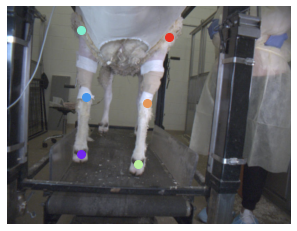

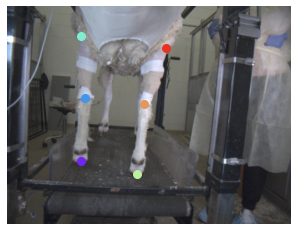

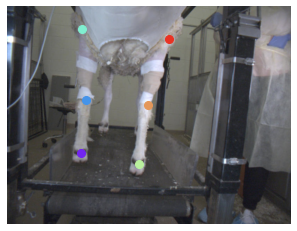

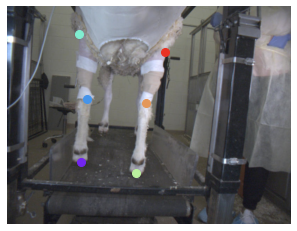

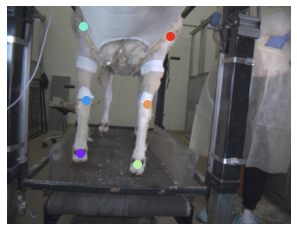

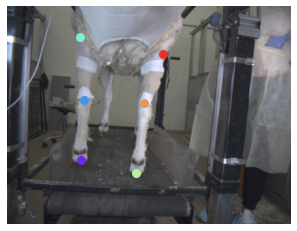

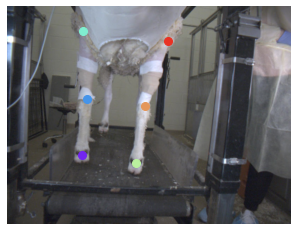

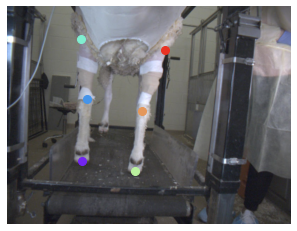

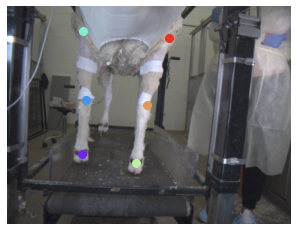

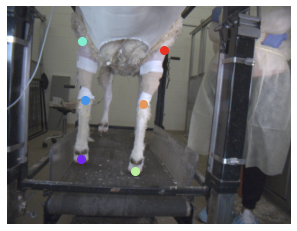

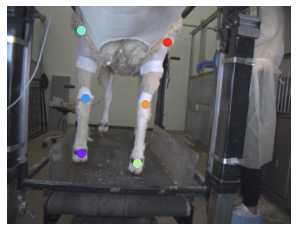

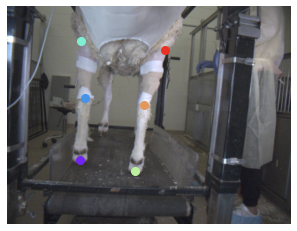

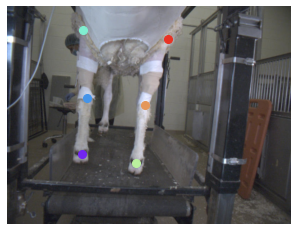

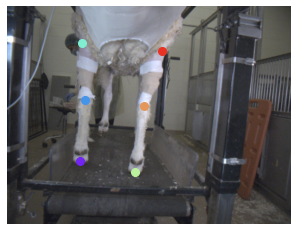

ValueError: could not convert string to float: 

In [12]:
getPerfectPicture(b1_k, b1_j)

In [ ]:
from matplotlib import image
from matplotlib import pyplot as plt

def showPicture_2(k, j, n):
    directory = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam1/"
    directory = directory + imgs[n]
    
    
    img = image.imread(directory)
    
    colors = ["#7225F0", "#4494EA", "#80EED0", "#BAF09E", "#E4975A", "#E93223"]
    plt.plot()
    for i in range(6):
        x, y = float(k[i*2]), float(k[i*2+1])
        x_j, y_j = float(j[i*2]), float(j[i*2+1])
        
        plt.plot(x, y, color=colors[i], marker='.', markersize=9)
        plt.plot(x_j, y_j, color=colors[i], marker='X', markersize=8)
        
    #plt.plot(k_x, k_y, color='r', marker='.', markersize=8)
    #plt.plot(j_x, j_y, color='b', marker='.', markersize=8)
    # plt.legend(labels=[])
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
    

In [ ]:
def getPerfectPicture_2(k, j):
    for i in range(len(k)): # 50
        if big(k[i], j[i]) == True:
            showPicture_2(k[i], j[i], i)
            print()
            print()
getPerfectPicture_2(b1_k, b1_j)